# EDA notebook

## Importing the Data

In [14]:
import pandas as pd
import numpy as np
import sqlite3
import data_preparation as dp
import matplotlib.pyplot as plt
from matplotlib import ticker as tkr

bom_cleaned = pd.read_csv("../data/bom.movie_gross.csv.gz")
conn = sqlite3.connect("../data/im.db")

In [15]:
bom_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [16]:
for table_name in imdb_tables:
    df = pd.read_sql(f"SELECT * from {table_name[0]}", conn)
    print(f"Table: {table_name[0]}")
    print(df.info(),"\n")

## GENRE VS RATING

In [17]:
genre_vs_rating=pd.read_sql('''
SELECT b.genres, avg(r.averagerating) as average_rating
FROM movie_basics b
	JOIN movie_ratings r
	USING (movie_id)
GROUP BY genres;'''
, conn)
genre_vs_rating.head(20)
genre_vs_rating.iloc[:,:1].head()

## GENRE VS GROSS

In [18]:
genre=pd.read_sql('''
SELECT primary_title as 'title', genres
FROM movie_basics
;'''
, conn)
pd.get_dummies(genre['genres'])
df[['First Name', 'Last Name']] = df.Student_details.str.split(",", expand = True)

In [19]:
df = bom_cleaned.merge(genre,how='inner',on='title')

## GENRE VS GROSS & BUDGET

## BUDGET VS GROSS

## WRITER VS GROSS

## DIRECTOR VS GROSS OR RATING

## RATED (R, M, PG, PG13) vs RATING (Popularity)

In [20]:
rt = pd.read_csv("../data/rt_cleaned_combined.csv")

In [21]:
ratings = rt.groupby('rated',as_index=False)['new_rating'].mean()
ratings

,rated,new_rating
0,G,0.660845
1,NR,0.672566
2,PG,0.591437
3,PG-13,0.564879
4,R,0.600617


''

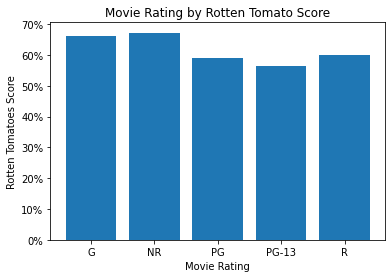

In [22]:
fig, ax = plt.subplots()

ax.bar(x=ratings['rated'], height = ratings['new_rating']*100)
ax.set_ylabel('Rotten Tomatoes Score')
ax.set_xlabel('Movie Rating')
ax.set_title("Movie Rating by Rotten Tomato Score")
ax.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}%'))
;

## RUNTIME VS GROSS/RATING (LOOK BY GENRE)

In [23]:
imdb_gross = pd.read_csv('../data/df_imdb_w_fin.csv')
imdb_gross.head()

,Unnamed: 0,movie_id,primary_title,start_year,runtime_minutes,genres,title_merge_x,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_merge_y
0,0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",sunghursh,NaN,NaN,NaN,NaN,NaN,NaN
1,1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",onedaybeforetherainyseason,NaN,NaN,NaN,NaN,NaN,NaN
2,2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,theothersideofthewind,NaN,NaN,NaN,NaN,NaN,NaN
3,3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",sabsebadasukh,NaN,NaN,NaN,NaN,NaN,NaN
4,4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",thewanderingsoapopera,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
gross_runtime = imdb_gross.loc[(imdb_gross['domestic_gross'] > 0) & (imdb_gross['runtime_minutes'] > 30), ['primary_title', 'runtime_minutes', 'domestic_gross', 'worldwide_gross']]
gross_runtime

,primary_title,runtime_minutes,domestic_gross,worldwide_gross
38,Wazir,103.0,1100000.0,1100000.0
40,The Overnight,88.0,1109808.0,1165996.0
48,On the Road,124.0,744000.0,8744000.0
49,On the Road,124.0,720828.0,9313302.0
55,The Secret Life of Walter Mitty,114.0,58200000.0,188100000.0
...,...,...,...,...
147484,The Hunt,90.0,613000.0,613000.0
147521,Ali,110.0,58183966.0,87683966.0
147809,Columbus,85.0,1017107.0,1110511.0
147862,Unstoppable,84.0,81600000.0,167800000.0


In [57]:
avg_runtime = gross_runtime.runtime_minutes.mean()
print(avg_runtime)

avg_gross = gross_runtime.worldwide_gross.mean()
print(avg_gross)

103.6110361120486
93559148.20889302


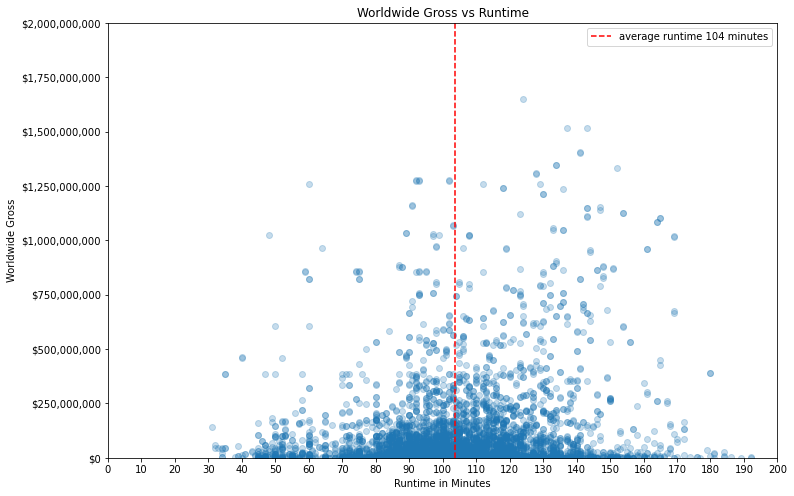

''

In [65]:
fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(x=gross_runtime.runtime_minutes, y=gross_runtime.worldwide_gross, alpha = .25)
ax.axvline(x = avg_runtime, color = 'r', linestyle = '--', label = 'average runtime 104 minutes')
#ax.axhline(y = avg_gross, color = 'y', linestyle = '-.', label = 'average gross $93,559,148')
ax.set_title("Worldwide Gross vs Runtime")
ax.set_xlabel('Runtime in Minutes')
ax.set_ylabel('Worldwide Gross')
ax.set_xlim(0,200)
ax.set_ylim(0,2000000000)
ax.set_xticks(np.arange(0, 210, 10))
ax.yaxis.set_major_formatter(tkr.StrMethodFormatter('${x:,.0f}'))
ax.legend()
ax.dpi = 800
plt.show()
;


## Runtime vs Budget

In [42]:
bud_runtime = imdb_gross.loc[(imdb_gross['production_budget'] > 0) & (imdb_gross['runtime_minutes'] > 30), ['primary_title', 'runtime_minutes', 'production_budget']]
bud_runtime

,primary_title,runtime_minutes,production_budget
20,Foodfight!,91.0,45000000.0
40,The Overnight,88.0,200000.0
49,On the Road,124.0,25000000.0
56,The Secret Life of Walter Mitty,114.0,91000000.0
61,A Walk Among the Tombstones,114.0,28000000.0
...,...,...,...
147286,The First Time,90.0,2000000.0
147382,Ray,111.0,40000000.0
147521,Ali,110.0,109000000.0
147809,Columbus,85.0,700000.0


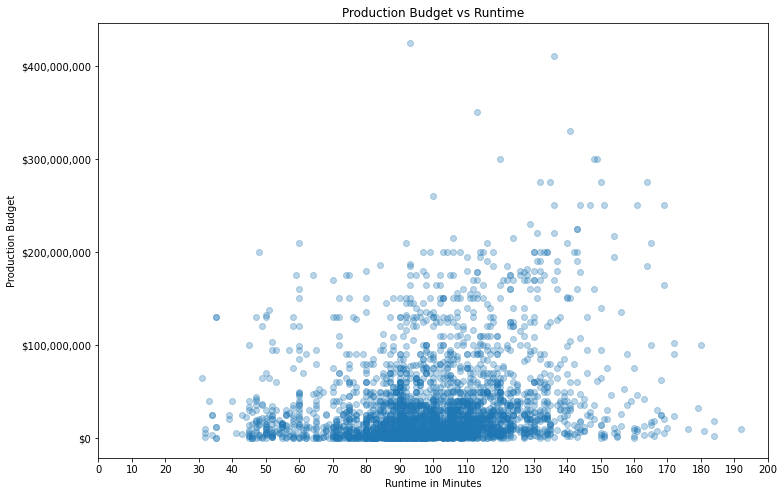

''

In [45]:
fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(x=bud_runtime.runtime_minutes, y=bud_runtime.production_budget, alpha = .3)
ax.set_title("Production Budget vs Runtime")
ax.set_xlabel('Runtime in Minutes')
ax.set_ylabel('Production Budget')
ax.set_xlim(0,200)
# ax.set_ylim(0,2000000000)
ax.set_xticks(np.arange(0, 210, 10))
ax.yaxis.set_major_formatter(tkr.StrMethodFormatter('${x:,.0f}'))

plt.show()
;

## RATING(good vs bad) VS GROSS	

In [ ]:
imdb_ratings = pd.read_sql('''
SELECT b.primary_title, r.averagerating
FROM movie_basics b
    JOIN movie_ratings r
    ON b.movie_id = r.movie_id
WHERE r.numvotes > 100    
;'''
, conn)

In [ ]:
gross_ratings = imdb_gross.merge(imdb_ratings,
                how = 'inner',
                on = 'primary_title')

In [ ]:
gross_ratings.head()

In [ ]:
gr_filtered = gross_ratings.loc[ (gross_ratings['averagerating'] > 0) & (gross_ratings['domestic_gross'] > 0), ['primary_title', 'averagerating', 'domestic_gross', 'worldwide_gross']]
gr_filtered

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.scatter(x=gr_filtered.averagerating, y=gr_filtered.worldwide_gross, alpha = .3)
ax.set_title("Worldwide Gross vs Average Rating")
ax.set_xlabel('Average Rating')
ax.set_ylabel('Worldwide Gross')


plt.show()
;

In [ ]:
import seaborn as sns

In [ ]:
# testing out Sam's code
sns.regplot(x = gr_filtered.averagerating, y = gross_runtime.worldwide_gross, marker = '*',
            scatter_kws={"color":"darkred","alpha":0.1,"s":20}, fit_reg = True)